In [1]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('fivethirtyeight')
%matplotlib inline

# Defining the parameters
batch_size = 32
num_classes = 10
epochs = 50

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


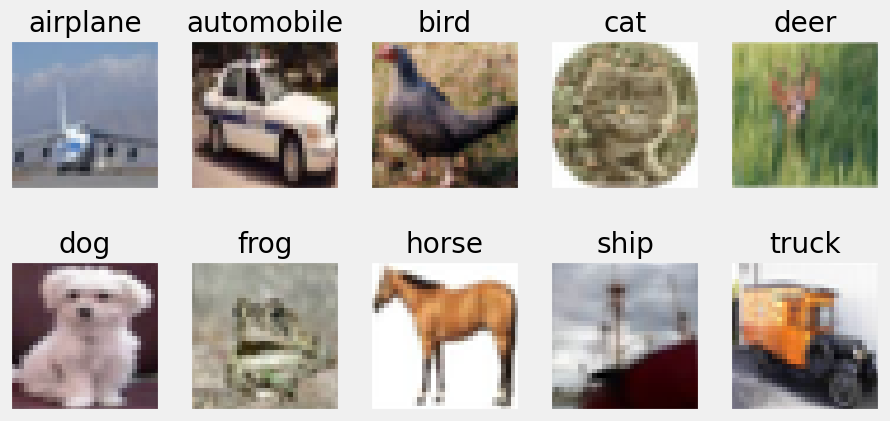

In [3]:

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(10,5))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [4]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [5]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# нормализуем
x_train /= 255
x_test /= 255

epochs=50

# Tренировочка
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)


Epoch 1/50


1563/1563 [==============================] - 117s 74ms/step - loss: 8.5460 - accuracy: 0.4191 - val_loss: 6.4562 - val_accuracy: 0.4878
Epoch 2/50
1563/1563 [==============================] - 111s 71ms/step - loss: 4.9768 - accuracy: 0.5600 - val_loss: 3.8981 - val_accuracy: 0.5937
Epoch 3/50
1563/1563 [==============================] - 123s 78ms/step - loss: 3.0983 - accuracy: 0.6381 - val_loss: 2.6337 - val_accuracy: 0.6190
Epoch 4/50
1563/1563 [==============================] - 127s 81ms/step - loss: 2.0861 - accuracy: 0.6860 - val_loss: 1.7427 - val_accuracy: 0.7126
Epoch 5/50
1563/1563 [==============================] - 112s 72ms/step - loss: 1.5379 - accuracy: 0.7200 - val_loss: 1.3526 - val_accuracy: 0.7318
Epoch 6/50
1563/1563 [==============================] - 115s 73ms/step - loss: 1.2354 - accuracy: 0.7424 - val_loss: 1.2257 - val_accuracy: 0.7198
Epoch 7/50
1563/1563 [==============================] - 111s 71ms/step - loss: 1.0658 - accuracy: 0.7602 - val_loss

In [7]:
predictions = model.predict(x_test)

313/313 [==============================] - 5s 17ms/step


In [9]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 6s 18ms/step - loss: 1.0174 - accuracy: 0.8403
[1.0174115896224976, 0.8403000235557556]
